## Emission data exploring and cleaning
This file contains the major exploration and cleaning that has been done with the emission data.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explanation of agriculture emissions datafiles

#### Emission data number 1
The first emissions data in our dataset covers all emissions from agriculture. That is, both the emissions from crops and livestock production. 

In [9]:
emission_data = pd.read_csv('raw_data/emission_data_continent.csv', sep = ',', encoding = 'latin-1')
emission_data.head(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1961,1961,gigagrams,233438.4999,A,"Aggregate, may include official, semi-official...",NaN
1,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1962,1962,gigagrams,237662.8733,A,"Aggregate, may include official, semi-official...",NaN
2,GT,Agriculture Total,5100,Africa,7231,Emissions (CO2eq),1711,Agriculture total,1963,1963,gigagrams,241883.7194,A,"Aggregate, may include official, semi-official...",NaN


In [10]:
def explain_df(df):
    print('The data contain(s) the following: ') 
    print(f'    area(s)    : {(df.Area.unique().tolist())}')
    print(f'    years      : {(df.Year.min())} - {df.Year.max()}')
    print(f'    item(s)    : {(df.Item.unique().tolist())}')
    print(f'    elements(s): {(df.Element.unique().tolist())}')
    print(f'    unit(s)    : {(df.Unit.unique().tolist())}')

explain_df(emission_data)


The data contain(s) the following: 
    area(s)    : ['Africa', 'Northern America', 'South America', 'Asia', 'Europe', 'Oceania']
    years      : 1961 - 2017
    item(s)    : ['Agriculture total']
    elements(s): ['Emissions (CO2eq)']
    unit(s)    : ['gigagrams']


As you can see from the print above we have data from all the continents, between 1961 and 2017, only agriculture total emission, all data is in CO2 gigagram. 

Lets examine if there's any data missing.

In [11]:
# Is any information missing?
print("Missing information in categorized dataset:\n", emission_data.isna().sum())

Missing information in categorized dataset:
 Domain Code           0
Domain                0
Area Code             0
Area                  0
Element Code          0
Element               0
Item Code             0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value                 0
Flag                  0
Flag Description      0
Note                342
dtype: int64


Data seems good, no missing values, lets plot the data to get a sense of how it looks.

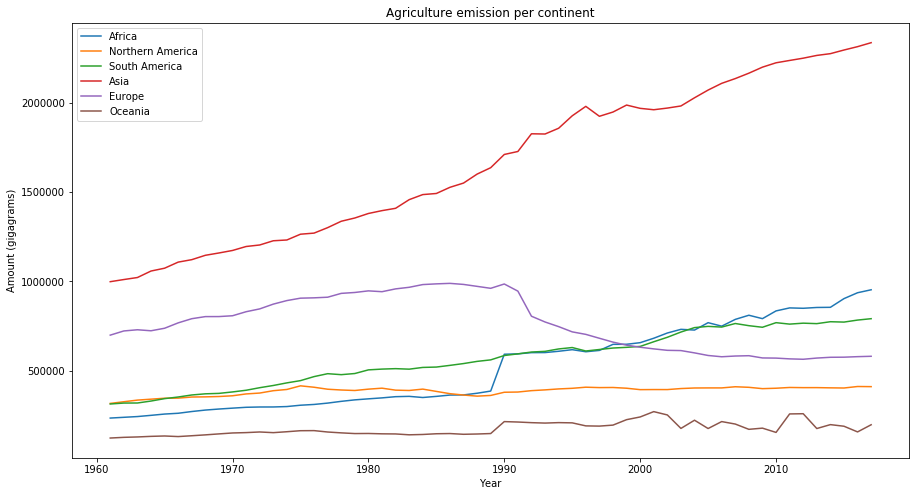

In [12]:
fig = plt.figure(figsize = (15,8))

for area in emission_data.Area.unique():
    plt.plot(emission_data[emission_data['Area'] == area].Year.values, 
             emission_data[emission_data['Area'] == area].Value.values)
    
plt.legend(emission_data.Area.unique())
plt.title('Agriculture emission per continent')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')
plt.show()

#### Plot
The data does not have any extreme outliers and without any particular knowledge in agriculture emissions, the data seems to make sense.

In [13]:
# Save to pickle
emission_data.to_pickle('./data/pickles/agriculture_emissions_continents.pkl')

#### Emission data number 2

We also have another emissions file with some categories to easier be able to determine differences in emission between crops and livestock production. This data contains each country a

In [14]:
categorized_emission_data = pd.read_csv('raw_data/Emission_data.csv', sep = ',', encoding = 'latin-1')
explain_df(categorized_emission_data)

The data contain(s) the following: 
    area(s)    : ['Africa', 'Northern America', 'South America', 'Asia', 'Europe', 'Oceania']
    years      : 1961 - 2016
    item(s)    : ['Cereals excluding rice', 'Rice, paddy', 'Meat, cattle', 'Milk, whole fresh cow', 'Meat, goat', 'Milk, whole fresh goat', 'Meat, buffalo', 'Milk, whole fresh buffalo', 'Meat, sheep', 'Milk, whole fresh sheep', 'Milk, whole fresh camel', 'Meat, chicken', 'Eggs, hen, in shell', 'Meat, pig']
    elements(s): ['Emissions (CO2eq)', 'Production']
    unit(s)    : ['gigagrams', 'tonnes']


This dataset contains data about the CO2 emissions coming from various areas (_items_) such as _Rice_ an _Meat, sheep_ etc. Some of the data has information about production of each item which is not out of interest as we are interested in emissions. We will therefore remove rows with these values.

In [15]:
# Keep only emission data
categorized_emission_data = categorized_emission_data[categorized_emission_data.Element == 'Emissions (CO2eq)']

explain_df(categorized_emission_data)
# Is any information missing?
print("Missing information in categorized dataset:\n", categorized_emission_data.isna().sum())
categorized_emission_data.head(3)

The data contain(s) the following: 
    area(s)    : ['Africa', 'Northern America', 'South America', 'Asia', 'Europe', 'Oceania']
    years      : 1961 - 2016
    item(s)    : ['Cereals excluding rice', 'Rice, paddy', 'Meat, cattle', 'Milk, whole fresh cow', 'Meat, goat', 'Milk, whole fresh goat', 'Meat, buffalo', 'Milk, whole fresh buffalo', 'Meat, sheep', 'Milk, whole fresh sheep', 'Milk, whole fresh camel', 'Meat, chicken', 'Eggs, hen, in shell', 'Meat, pig']
    elements(s): ['Emissions (CO2eq)']
    unit(s)    : ['gigagrams']
Missing information in categorized dataset:
 Domain Code         0
Domain              0
Area Code           0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1961,1961,gigagrams,6404.6437,A,"Aggregate, may include official, semi-official..."
1,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1962,1962,gigagrams,6841.1636,A,"Aggregate, may include official, semi-official..."
2,EI,Emissions intensities,5100,Africa,7231,Emissions (CO2eq),1718,Cereals excluding rice,1963,1963,gigagrams,7246.6931,A,"Aggregate, may include official, semi-official..."


We can see that this dataset is similar to the previous one apart from the _item_ column which contains multiple values, this is what we wanted. Futhermore we have no missing values. Let's save this file.

In [16]:
categorized_emission_data.to_pickle('./data/pickles/agriculture_emissions_continents_categorized.pkl')

**For now we will stick to the first dataset discussed in this notebook since we are more interested in the total agriculture emissions.**

Let's plot the _Agriculture, total_ emissions from the dataset 1. Let's also make use of the population data so we can normalize the data on the population of a given continent or the world.

In [17]:
# Get population data
population = pd.read_csv('./data/csv/pop_continents.csv')

area_year_population = population.groupby(['Area', 'Year']).agg({'Value':'sum','Unit':'first'}).reset_index()
world_year_population = area_year_population.groupby('Year').agg({'Value':'sum'}).reset_index()

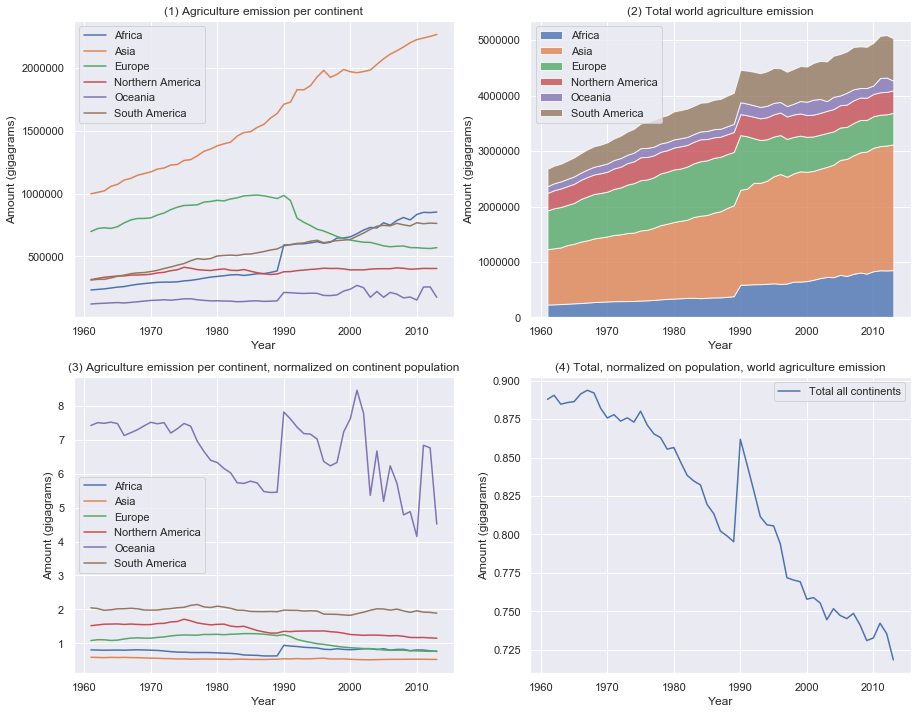

In [18]:
import warnings
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

area_year_emission = emission_data.groupby(['Area', 'Year']).agg({'Value':'sum','Unit':'first'}).reset_index()
area_year_emission = area_year_emission[(area_year_emission['Year'] <= 2013)]
x = area_year_emission.Year.unique()
plot_y_emi = []
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink']  
fig = plt.figure(figsize = (15,12))

areas = area_year_emission.Area.unique()

for area in areas:
    plt.subplot(2,2,3)
    plt.plot(area_year_emission[area_year_emission['Area'] == area].Year.values, 
             area_year_emission[area_year_emission['Area'] == area].Value.values/
             area_year_population[area_year_population['Area'] == area].Value.values)
   
    plt.subplot(2,2,1)
    plt.plot(area_year_emission[area_year_emission['Area'] == area].Year.values, 
             area_year_emission[area_year_emission['Area'] == area].Value.values)
    
    plot_y_emi.append(area_year_emission[area_year_emission['Area'] == area].Value.values.tolist())



plt.subplot(2,2,1)
plt.legend(areas)
plt.title('(1) Agriculture emission per continent')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

plt.subplot(2,2,3)
plt.legend(areas)
plt.title('(3) Agriculture emission per continent, normalized on continent population')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

# Global yearly emission
total_year_emission = area_year_emission.groupby('Year').agg({'Value':'sum'}).reset_index()
total_year_emission = total_year_emission[total_year_emission['Year'] <= 2013]

plt.subplot(2,2,2)
plt.stackplot(x, np.vstack(plot_y_emi), labels=area_year_emission.Area.unique(), alpha=0.8)
plt.legend(loc='upper left')
plt.title('(2) Total world agriculture emission')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

plt.subplot(2,2,4)
plt.plot(total_year_emission['Year'].values,
        total_year_emission['Value'].values/world_year_population['Value'].values)
plt.legend(['Total all continents'])
plt.title('(4) Total, normalized on population, world agriculture emission')
plt.xlabel('Year')
plt.ylabel('Amount (gigagrams)')

plt.show()

##### Emission area plot 
There's a few questions that arise when observing the plots above:
- We can observe a big increase in emission around year 1990 which seem slightly weird.
- In the normalized continent emissions _Oceania_ has a much greater and volatile normalized emission compared to the other continents. The relatively higher normalized emission by _Oceania_ could be reasonable given that they have a lot of livestock production, however the sudden jumps in value from year to year seem off.

Let's try and find an answer to these obeservations.
The reason that the emission jumps in 1990 is most likely because of _New estimates of CO 2 forest emissions and removals: 1990–2015._ Which is stated [at faostat](http://www.fao.org/faostat/en/#data/GT/metadata), where the data comes from, in point number 10.

Now, when it comes to the weird behaviour in _Oceania_'s emissions when should look at the data we have acquired regarding the crop and livestock production aswell as the population that _Oceania_ has in order to explain the weirdness. 
 

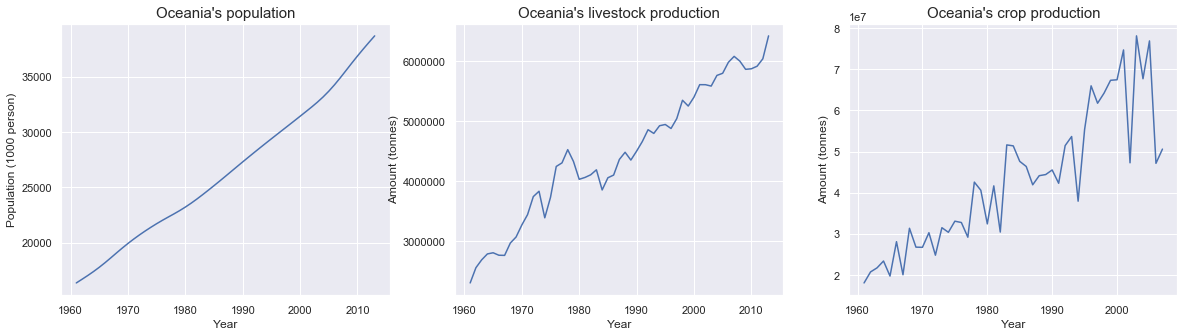

In [19]:
fig = plt.figure(figsize=(20,5))

# Oceania's population
plt.subplot(1,3,1)
plt.plot(area_year_population.Year.unique(), area_year_population[area_year_population.Area == 'Oceania'].Value.values)
plt.title('Oceania\'s population', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Population (1000 person)')

# Oceania's livestock production
plt.subplot(1,3,2)
meat_production_continents = pd.read_csv('data/csv/meat_continents.csv')
meat_production_oceania = meat_production_continents[(meat_production_continents.Area == 'Oceania') \
                                                     & (meat_production_continents.Item == 'Meat, Total')]
plt.plot(meat_production_oceania.Year.unique(), meat_production_oceania.Value.values)
plt.title('Oceania\'s livestock production', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Amount (tonnes)')

# Oceania's crops production
crop_production_continents = pd.read_pickle('data/pickles/crops_continents.pkl')
crop_production_oceania = crop_production_continents[(crop_production_continents.Area == 'Oceania')]\
                                                    .groupby('Year').agg({'Value':'sum'}).reset_index()
plt.subplot(1,3,3)
plt.plot(crop_production_oceania.Year.unique(), crop_production_oceania.Value.values)
plt.title('Oceania\'s crop production', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Amount (tonnes)')

plt.show()

We can see that there is nothing that seems to be weird with the _Oceania_'s population data, however the livestock and especially the crop production is volatile. This corresponds with the diffrences that we can observe in the agriculture emission caused by _Oceania_. Since _Oceania_ is the continent which produces the least amount of CO2 from agriculture compared to all other continents it is more likely to be volatile. For example, if the weather is bad for agriculture, it is more likely that the total amount will be affected compared to a bigger continent that is not as concentrated around a specific area.

#### Summarize

The data looks good and we are ready to move further with our analysis and use this data to answer the questions.

In [20]:
# Correlations
corr = np.corrcoef(x = total_year_emission.Value.values, y = world_year_population.Value.values)[0,1]
print(f'Correlation between agriculture emission and population is {round(corr,2)}')

Correlation between agriculture emission and population is 0.99


#### Example use of second dataset

In [21]:
sheep_prod = categorized_emission_data[categorized_emission_data.Item.str.contains('sheep')]

sheep_data = sheep_prod.groupby(['Area','Element','Year','Unit']).agg({'Value':'sum'})
sheep_data['Item'] = 'Sheep'

In [22]:
# Data for each countries sheep emissions per year
sheep_data.reset_index()

,Area,Element,Year,Unit,Value,Item
0,Africa,Emissions (CO2eq),1961,gigagrams,26107.8934,Sheep
1,Africa,Emissions (CO2eq),1962,gigagrams,25742.8884,Sheep
2,Africa,Emissions (CO2eq),1963,gigagrams,25928.7068,Sheep
3,Africa,Emissions (CO2eq),1964,gigagrams,26531.4870,Sheep
4,Africa,Emissions (CO2eq),1965,gigagrams,27693.8435,Sheep
...,...,...,...,...,...,...
331,South America,Emissions (CO2eq),2012,gigagrams,13038.5218,Sheep
332,South America,Emissions (CO2eq),2013,gigagrams,13089.1212,Sheep
333,South America,Emissions (CO2eq),2014,gigagrams,12595.7720,Sheep
334,South America,Emissions (CO2eq),2015,gigagrams,12690.6373,Sheep
